In [71]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import torch
import torchvision
from abc import ABC
import pickle
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from typing import List
from tqdm import tqdm
tqdm.pandas()
EMB = r"C:\Users\Wilk\PiSR1\data\emb.p"
RATINGS_SMALL = r"C:\Users\Wilk\PiSR1\data\ratings_small.csv"
SEED = 42


In [72]:
ratings = pd.read_csv(RATINGS_SMALL)
movies_emb = pickle.load( open( EMB, "rb" ) )
dataset = ratings.merge(movies_emb[['id', 'title','overview',"vector"]], left_on='movieId', right_on='id')
dataset = dataset.set_index("id")
dataset.userId = dataset.userId.astype("Int64")
target = dataset.rating.to_numpy()

dataset = dataset.drop(["timestamp","title","overview","movieId","rating"],axis=1).to_numpy()


In [73]:
tensors = []
for data in dataset:
    x = torch.FloatTensor(np.append(data[0],data[1]))
    tensors.append(x)


In [74]:
FLAT_SIZE = 768+1
OUTPUT = 1
BATCH_SIZE = 10

In [75]:
class ContentBaseRecommenderSystem(nn.Module):

    def __init__(self, input_size, hidden_feature_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_feature_size) #fully connected    
        self.fc2 = nn.Linear(hidden_feature_size, hidden_feature_size)
        self.fc3 = nn.Linear(hidden_feature_size, hidden_feature_size)
        self.out_layer = nn.Linear(hidden_feature_size, 1)
        self.act_fn = F.relu
        
    def forward(self, x):
        x = self.act_fn(self.fc1(x))
        x = self.act_fn(self.fc2(x))
        x = self.act_fn(self.fc3(x))
        out = self.out_layer(x)
        
        return out
    
    def predict(user_id: int) -> List[int]:
        """
        Predicts ranking of movies to watch for a user.

        Parameters
        ----------
        user_id : int
            User's id from the data set.

        Returns
        -------
        List[int]
            List of movies ids. Best recommendations first.
        """
        pass

    def predict_score(user_id: int, movie_id: int) -> float:
        """
        Predicts score for a given movie that a user would give.

        Parameters
        ----------
        user_id : int
            User's id from the data set.
        movie_id : int
            Movie's id from the data set.

        Returns
        -------
        float
            Predicted movie's score in range [0, 5]
        """
        pass

    def predict_scores(user_id: int) -> float:
        """
        Predicts scores for all the movies, that a user would give.

        Parameters
        ----------
        user_id : int
            User's id from the data set.

        Returns
        -------
        float
            Predicted movie's score in range [0, 5].
        """
        pass


In [76]:
LR = 0.001
EPOCHS = 30
HIDDEN_SIZE = 256
loss_func = torch.nn.MSELoss()

In [77]:
import torch.optim as optim


In [ ]:
history = {
    'loss':[]
}


net = ContentBaseRecommenderSystem(FLAT_SIZE,HIDDEN_SIZE)
optimizer = optim.Adam(net.parameters(),lr=LR)
for epoch in tqdm(range(EPOCHS)):
    sum_loss = 0
    for idx, data in enumerate(train_ratings):
        X = data
        y = torch.tensor(y_train[idx]).float() 
        output = torch.squeeze(net(X))
        loss  = loss_func(output,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sum_loss +=loss.item()
    history['loss'].append(sum_loss/len(train_ratings))

  3%|██▋                                                                             | 1/30 [05:16<2:32:52, 316.30s/it]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

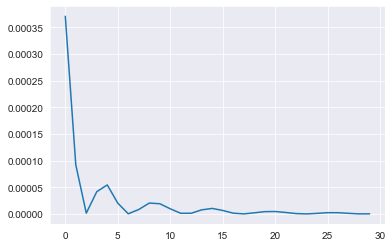

In [84]:
sns.set_style("darkgrid")
plt.plot(history['loss'])
plt.show()